In [161]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [9]:
import os
os.getcwd()  


'/home/jgonzalez/Github/segmentation_mapping'

In [55]:
import numpy as np
import matplotlib.pyplot as plt

import glob 
from rasterio.plot import show #graficar el mapa
import rasterio
from pathlib import Path
import cv2

# Imagen tif

(3, 4000, 6000)
(4000, 6000, 3) 255
image (4000, 6000, 3) 1.0


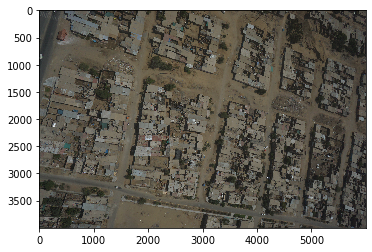

In [26]:
# 


input_filename = '/home/jrengifo/dataset_groundtruth/0.JPG'
#image
import rasterio
image1 = rasterio.open(input_filename)
print(image1.read().shape)

arrayRGB=(image1.read().transpose(1,2,0))
print(arrayRGB.shape,arrayRGB.max())

arrayRGB=(arrayRGB[:,:,:3]/arrayRGB.max())
print('image', arrayRGB.shape,arrayRGB.max()) # Ch,Hy,Wx tensor
plt.imshow(arrayRGB)
plt.show()

(3, 4000, 6000)
mask (4000, 6000, 3) 255 0


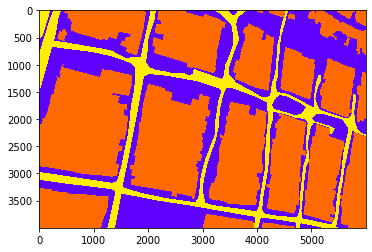

In [40]:
#mask
mask_filename='/home/jrengifo/dataset_groundtruth/0.tif'
mask1 = rasterio.open(mask_filename)
print(mask1.read().shape)

mask1.indexes
arraymask1=(mask1.read()).transpose(1,2,0)
arraymask1=(arraymask1).astype(np.uint8)  #importante uint8
print('mask', arraymask1.shape,np.max(arraymask1),np.min(arraymask1)) # Ch,Hy,Wx tensor
plt.imshow(arraymask1)


images founded: (49,)
images founded: (49,)
0 /home/jrengifo/dataset_groundtruth/0.JPG
0 /home/jrengifo/dataset_groundtruth/0.tif
(3, 4000, 6000)
(4000, 6000, 3) 255
image (4000, 6000, 3) 1.0
mask (4000, 6000, 3) 255 0


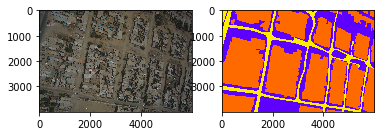

1 /home/jrengifo/dataset_groundtruth/1.JPG
1 /home/jrengifo/dataset_groundtruth/1.tif
(3, 4000, 6000)
(4000, 6000, 3) 213
image (4000, 6000, 3) 1.0
mask (4000, 6000, 3) 255 0


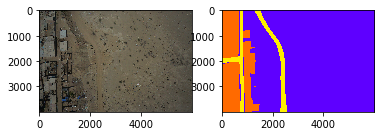

2 /home/jrengifo/dataset_groundtruth/10.JPG
2 /home/jrengifo/dataset_groundtruth/10.tif
(3, 4000, 6000)
(4000, 6000, 3) 255
image (4000, 6000, 3) 1.0
mask (4000, 6000, 3) 255 0


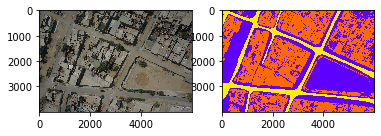

3 /home/jrengifo/dataset_groundtruth/11.JPG
3 /home/jrengifo/dataset_groundtruth/11.tif
(3, 4000, 6000)
(4000, 6000, 3) 255
image (4000, 6000, 3) 1.0
mask (4000, 6000, 3) 255 0


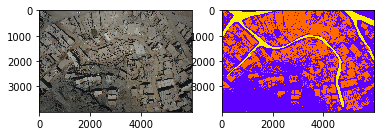

In [39]:

get_files_path = '/home/jrengifo/dataset_groundtruth/*.JPG'
dataset_images = np.array(sorted(glob.glob(get_files_path)))
print('images founded:', dataset_images.shape)
    
print('images founded:', dataset_images.shape)
for i, input_path in enumerate(dataset_images[:4]):
     
    print(i,input_path)

    
    mask_path =input_path.replace('JPG','tif')
    print(i,mask_path)        
    index_imgs=i
   ############ imagen #######################
    image1 = rasterio.open(input_path)
    print(image1.read().shape)
    arrayRGB=(image1.read().transpose(1,2,0))
    print(arrayRGB.shape,arrayRGB.max())

    arrayRGB=(arrayRGB[:,:,:3]/arrayRGB.max())
    print('image', arrayRGB.shape,arrayRGB.max()) # Ch,Hy,Wx tensor
    plt.subplot(1,2,1)
    plt.imshow(arrayRGB)

    ############ masks #########################
    mask1 = rasterio.open(mask_path)
    mask1.indexes
    arraymask1=(mask1.read()).transpose(1,2,0)
    arraymask1=(arraymask1[:,:,:]).astype(np.uint8)  #importante uint8
    print('mask', arraymask1.shape,np.max(arraymask1),np.min(arraymask1)) # Ch,Hy,Wx tensor

    plt.subplot(1,2,2)
    plt.imshow(arraymask1)
    plt.show()



# Crop images and masks

In [48]:
!python create_dataset.py --dataset-path '/home/jrengifo/dataset_groundtruth' --dataset-file 'dataset/data_512'

Cortando pathes----------------
out_path_images dataset/data_512/images
images founded: (49,)
0 /home/jrengifo/dataset_groundtruth/0.JPG
0 /home/jrengifo/dataset_groundtruth/0.tif
/home/jgonzalez/anaconda3/envs/pytorch/lib/python3.6/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/jgonzalez/anaconda3/envs/pytorch/lib/python3.6/site-packages/rasterio/__init__.py:226: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  **kwargs)
Images-elapsed time: 1.5500436602160335
Masks-elapsed time: 0.3868230143561959
black images >15% (0,)
1 /home/jrengifo/dataset_groundtruth/1.JPG
1 /home/jrengifo/dataset_groundtruth/1.tif
Images-elapsed time: 1.4500414356589317
Masks-elaps

#check elimination of whites and blacks 

# Creation of  train and val set

In [88]:
from get_train_test_1 import split_train_test
# change the data path here
data_HR_path= Path('dataset') 
images_path=str('dataset/data_512/images')

#Names to the files
train_val_file='train_val_512'
test_file='test_512'
percent_test=0.10 #10%

split_train_test(original_dataset_dir= images_path, 
                 base_dir = str(data_HR_path),
                 test_split = percent_test, 
                 train_file=train_val_file,
                 test_file=test_file)

3773 3396 377
dataset/train_val_512/images
dataset/test_512/images


# Plot  images + mask

In [98]:
def mask_overlay(image, mask, color=(15, 15, 0)):
    """
    Helper function to visualize mask over the img
    """
    print(mask.shape)      
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.float32)
    weighted_sum = cv2.addWeighted(mask, 0.3, image, 0.7, 0.)
    img = image.copy()
    ind = mask[:, :, 0] > 0  
    img[ind] = weighted_sum[ind]

    return img

def plot_img_mask(img_path):
    img = np.load(str(img_path)).transpose(1,2,0)

    print(np.shape(img),np.min(img),np.max(img))

    img2 = (img[:,:,:3].astype(np.float32))/np.max(img)
    #inp = (img*255).astype(np.uint8)
    mask = np.load(str(img_path).replace('images', 'masks').replace(r'.npy', r'_a.npy'), 0).transpose(1,2,0)
    
    #mask=mask.reshape(mask.shape[1],-1)
    mask = (mask[:,:,1]> 0).astype(np.uint8)  #np .max(mask, axis=2)  #convert of 3 channel to 1 channel
    #mask=(mask > 0).astype(np.uint8)
    #mask=(mask > 0).astype(np.float32)
    
    
    fig = plt.figure(figsize=(30, 30))  
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    ax1=plt.subplot(131)
    ax1.imshow(img2)
    ax2=plt.subplot(132)
    ax2.imshow(mask)

    ax3=plt.subplot(133)
    ax3.imshow(mask_overlay(img2, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) 4 233
(512, 512)


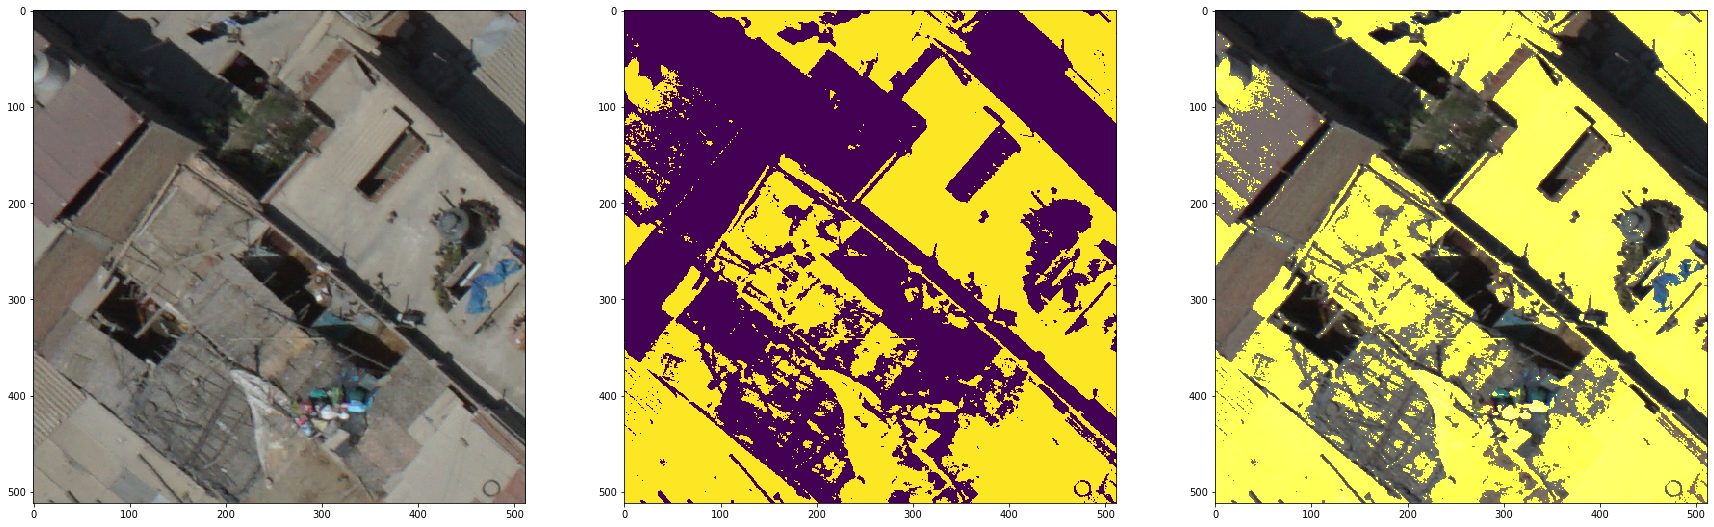

In [92]:
img_path ="dataset/data_512/images/3_512-1024.npy"
plot_img_mask(img_path)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) 3 183
(512, 512)


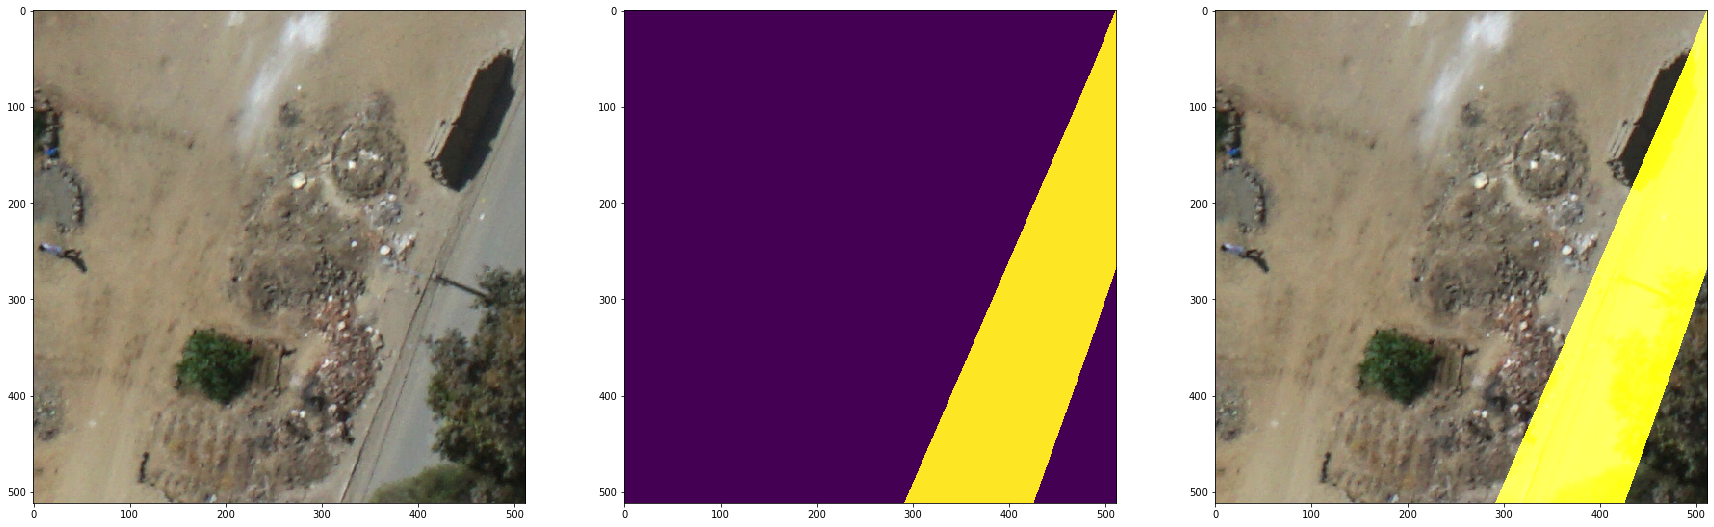

In [93]:
img_path ="dataset/data_512/images/2_512-1024.npy"
plot_img_mask(img_path)


# train

In [ ]:
# falta create files of outpout automaticaly

In [100]:
!python train.py   --model UNet  --n-epochs 1 --lr 1e-5 --batch-size 4 

cuda:1
CUDA is available!  Training on GPU ...
channels: [0, 1, 2] len 3
device model [1]
512 _100_percent_512
data_path: dataset
num train = 2988, num_val = 747, num_test=716
Train: dataset/data_512 2988 min  0 max  255
Val: dataset/data_512 747 min  0 max  255
Test: dataset/data_512 716 -min  0 max  255
All: dataset/data_512 3773 min  0 max  255
3
elapsed time: 15.084939175285399
Train mean:[0.30834536 0.29716143 0.26178063]
std:[0.12877709 0.12047772 0.10747423]
Val mean:[0.30961291 0.29826674 0.26248695]
std:[0.12828083 0.12018558 0.10715523]
Test mean:[0.30913508 0.29806587 0.26308162]
std:[0.12903591 0.12108713 0.10814695]
All mean:[0.30864774 0.29745071 0.26200355]
std:[0.1285038  0.12024809 0.10725713]
255 [0.30834536 0.29716143 0.26178063] [0.12877709 0.12047772 0.10747423]
Epoch 0/0
----------
LR 1e-05
dataloader: 747
train: bce: 0.686679, loss: 0.676330, dice_loss: 0.665980, jaccard_loss: 0.771291
dataloader: 187
val: bce: 0.687486, loss: 0.668694, dice_loss: 0.649902, jacca

In [289]:
!python plotting.py --out-file '512' --stage 'test' --name-file '_100_percent_512' --name-model 'UNet' --count 716 --n-epochs  30

Figure(640x480)
(430, 1, 5, 512, 512) (430, 1, 1, 512, 512) (430, 1, 1, 512, 512)


In [296]:
!python plotting.py --out-file '512' --stage 'test' --name-file '_100_percent_512' --name-model 'UNet11' --count 430 --n-epochs  45

Figure(640x480)
(430, 1, 5, 512, 512) (430, 1, 1, 512, 512) (430, 1, 1, 512, 512)


## Predictions unlabel images

In [ ]:
##
from unlabeled_plotting import plot_prediction
path_model=''
file_unlabel=''
plot_prediction(path_model=path_model,unlabel_name_file=file_unlabel)